<a href="https://colab.research.google.com/github/AiDAPT-A/2024-Q3-ai-in-architecture/blob/main/tutorials/4_beyond_boundaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond boundaries: Building aerial image collection and representation

## 📌 Overview
The goal of this tutorial is to broaden your perspective on how to conduct data-driven analysis at scale within an architectural *context* by computing *building representations* *beyond boundaries*.

More specifically, you will automatically extract aerial imagery from building footprints and corresponding geographical information. Then, you will compute meaningful building aerial image features via pre-trained computer vision foundation models. Following the process, you will be able to interpret whether your machine can spot (dis)similar buildings. How exciting!

<center>
<img src="https://drive.google.com/uc?export=view&id=1Hki5hJcTkRUm21YQSOK806ajMP92EbBQ" alt="floor-layout" class="center" width="750px">
</center>

### 🧠 **Learning objectives**
- Visualize and interpret *building+context* representations
- Automatically extract aerial images and create a customized dataset
- Generate image embeddings from pre-trained foundation models
- Locate building footprints from geographical information
- Compute the distance between feature vectors

### 🐍 **New in Python**
- Dictionaries (reminder): `dict`
- Torch tensors: `torch`
- JSON and pickle imports/exports: `json`, `pickle`
- Random number generation: `random`

### 🌍 1. Building footprint
- **Geopandas**: Recall what you learned in Tutorial 2.
- **3D BAG**: Discover an extensive database of buildings in the Netherlands.

### 📸 2. Aerial images
- **QGIS skills**: Acquire hands-on experience with QGIS for spatial data analysis.
- **Boundary definition**: Learn to define geographic boundaries for image collection.
- **Image extraction**: Master the skill of extracting images automatically within set boundaries.

### 🎨 3. Image Representation
- **Representation methods**: Methods for representing images for analysis.
- **Foundation models**: Learn about different machine learning models for image processing.
- **Embedding creation**: Learn how to create and use embeddings for image representation.

### 👥 4. Building similarity
- **Distance**: Compute the Euclidean distance between two *vectors*.
- **Measure similarity**: Use data-driven methods to compute similarity.
- **Critical analysis**: Visualize and interpret the results.

### 💻 Assignment
- **Hands-on project**: Leverage what you have learned and apply it at **scale** (6k buildings!).

## Buildings footprint

### Directory and file management
Let's set up the working path as explained in [Tutorial 2](https://github.com/AiDAPT-A/2024-Q3-ai-in-architecture/blob/main/tutorials/2_from_3D_to_2D.ipynb). Feel free to create and use a specific folder of your choice.

In [1]:
#import drive and os libraries
from google.colab import drive
import os

#mount google drive
drive.mount('/content/drive', force_remount=True)

#directory where the file are/will be stored
working_path = "/content/drive/MyDrive/Tutorial_beyond_boundaries"
# using chdir to change the directory
os.chdir(working_path)

Mounted at /content/drive


In [2]:
# Hmmm, where are we?
os.getcwd()

'/content/drive/MyDrive/Tutorial_beyond_boundaries'

### Buildings footprint
So far, nothing really new. Let's get now into it! You will extract images from a region of your choice within the Netherlands. How cool is that?
Select a specific tile and download the corresponding GeoPandas file from [3D BAG](https://3dbag.nl/en/download). Yes, you are guessing it right, go for the `.gpkg` file.
Since you are already GeoPandas expert, this task should still be very smooth.
Let's take an opportunity to visualize the collected buildings footprint.



<center>
<img src="https://drive.google.com/uc?export=view&id=1uGp8bKEtj5HAVdR_ovawFi0Lecob5x_r" alt="floor-layout" class="center" width="450px">
</center>

In [3]:
import geopandas
## Load GeoPandas file
path_to_data = "tile_tutorial.gpkg" # This should contain the name of the downloaded geopandas file
tile = geopandas.read_file(path_to_data)
tile.head()

,b3_bag_bag_overlap,b3_dak_type,b3_h_maaiveld,b3_kas_warenhuis,b3_mutatie_ahn3_ahn4,b3_nodata_fractie_ahn3,b3_nodata_fractie_ahn4,b3_nodata_radius_ahn3,b3_nodata_radius_ahn4,b3_opp_buitenmuur,...,oorspronkelijkbouwjaar,status,tijdstipeindregistratielv,tijdstipinactief,tijdstipinactieflv,tijdstipnietbaglv,tijdstipregistratie,tijdstipregistratielv,voorkomenidentificatie,geometry
0,0.0,multiple horizontal,-0.403,False,False,0.000000,0.0,0.327731,0.315555,81.440002,...,1991.0,Pand in gebruik,None,None,None,None,2010-10-13T12:40:37Z,2010-10-13T13:00:55Z,1.0,"POLYGON Z ((83758.008 445974.906 -0.402, 83759..."
1,0.0,horizontal,-0.453,False,False,0.000000,0.0,0.266385,0.338315,23.670000,...,1991.0,Pand in gebruik,None,None,None,None,2010-10-13T12:39:30Z,2010-10-13T13:00:51Z,1.0,"POLYGON Z ((83744.148 445985.125 -0.452, 83744..."
2,0.0,multiple horizontal,-0.575,False,False,0.008230,0.0,0.389827,0.363091,173.889999,...,1991.0,Pand in gebruik,None,None,None,None,2020-07-09T13:05:06Z,2020-07-09T13:10:10Z,2.0,"POLYGON Z ((83749.500 445971.000 -0.574, 83748..."
3,0.0,multiple horizontal,-0.452,False,False,0.021164,0.0,0.337877,0.296668,76.410004,...,1991.0,Pand in gebruik,None,None,None,None,2010-10-13T13:10:06Z,2010-10-13T13:30:54Z,1.0,"POLYGON Z ((83749.117 445973.531 -0.451, 83750..."
4,0.0,multiple horizontal,-0.447,False,False,0.005263,0.0,0.376935,0.386116,81.400002,...,1991.0,Pand in gebruik,None,None,None,None,2010-10-13T12:40:37Z,2010-10-13T13:00:55Z,1.0,"POLYGON Z ((83753.562 445974.219 -0.446, 83755..."


From all available data, let's visualize plain footprints and classified by *dak_type* (roof type). If you are curious enough, BAG attributes are listed here in [Dutch](https://docs.3dbag.nl/nl/schema/attributes/).

<Figure size 1000x600 with 0 Axes>

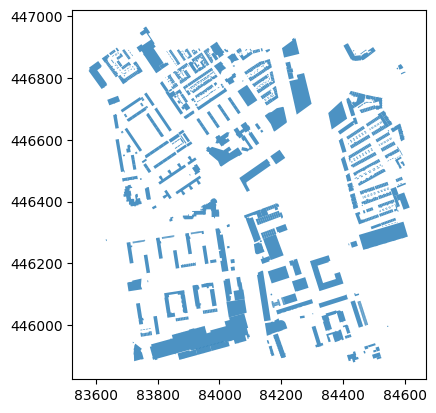

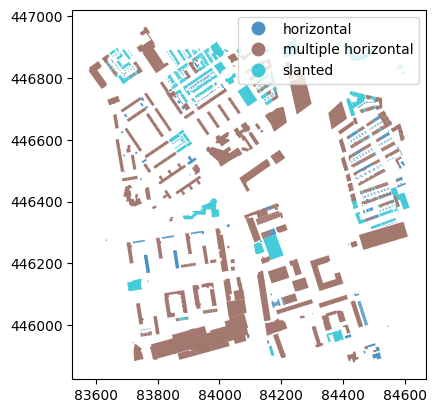

In [4]:
# Plot buildings footprint
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
tile.plot(legend=True, alpha=0.8) # Plain footprint
tile.plot(column='b3_dak_type', legend=True, alpha=0.8) # Footprint roof type

plt.show()

### Retrieve geographical coordinates
You are now ready to store the geographical coordinates for a set of (50) buildings and stored them in a dictionary. Later on, you will reuse this dictionary to extract aerial images on QGIS. Some new Python concepts here:
+ JSON: This package will help us to import and export lightweight files in a readable format.
+ Random: We can generate *pseudo random numbers* with this package.

<center>
<img src="https://drive.google.com/uc?export=view&id=1ROt1WTNbouo87IOveMPP5Fg2WnZS9Fb0" alt="floor-layout" class="center" width="650px">
</center>

In [5]:
# Load Python modules
import numpy as np
import json
import random
'''
get coordinates for each building and stored them in a dictionary
    - Loop over BAG IDs
    - Extract coordinates
    - Compute bounding box
    - Store results
'''

n_buildings = 50 # number of building footprints
additional_padding = 10 # let's add some context (note that this variable is defined in meters)

totaln_buildings = len(tile) # how many building we have in the tile?
random.seed(42) # initialize random seed (if we would like to always get the same sequence of random numbers)

# randomly select n_buildings
ind_build = random.sample(range(totaln_buildings), n_buildings)

'''
Create a dictionary build_coord where:
- Key: building_index (ind_build) # Think of this like a building ID
- Value: A list with a box coordinates that enclose the building footprint

To get the coordinates box, extract the coordinates from geopandas and find the 4 corners with basic min, max operations.
'''
build_coord = {}
for i in ind_build:
    # Retrieve geographical coordinates from geopandas
    coord = np.array(tile.geometry.iloc[i].exterior.coords)
    coord_box = []
    coord_box.append(coord[:,0].min() - additional_padding)
    coord_box.append(coord[:,1].min() - additional_padding)
    coord_box.append(coord[:,0].max() + additional_padding)
    coord_box.append(coord[:,1].max() + additional_padding)
    build_coord[i] = coord_box

'''
As announced, let's store the dictionary as json file (very convenient!).
Note that:
- Filename is the string "build_dic.json"
- 'w' indicates that we are writing a text file
- .dump, well, speak by itself
'''
with open("build_dic.json", 'w') as file_id:
    json.dump(build_coord, file_id)

## Aerial images

### Automated aerial image extraction
It is the perfect moment to switch gears, let's establish an automated process to extract aerial images via QGIS. The dictionary you created previously will be now very useful to define the contour of the image based on geographical coordinates. If you need help to install QGIS and PDOK's plugin, jump to the additional material at the end of the tutorial.

N.B. In principle, images can be automatically extracted via an API (e.g. Cyclomedia), yet QGIS is very useful in our case to define the precise boundaries of the aerial image through a box of geographical coordinates.

<center>
<img src="https://drive.google.com/uc?export=view&id=1qSBDBTudubHXO6rddLbVAcMCCCqpOL58" alt="floor-layout" class="center" width="450px">
</center>


Run the code snippet provided below on QGIS' Python console. QGIS will do the work for you!

🚨 Alert: Please set up correctly the directory where the dictionary `build_dic` is stored as well as the directory where you would like to store the images. Also, be careful the directory should be specified with forward slash symbols `/` and not `\`. If you are on a Windows machine, you may have to manually edit it.

🚨 Alert: Do not forget to verify the correct layer is specified in `layers`.

🚨 Alert: Be sure you specified the coordinate reference system CRS: EPSG:28992.

🙌 After you complete the process, please take also a moment to cross-check the quality and enjoy the extracted images.

```
# Code snippet - Python code for extracting images from QGIS.

# Load modules
from qgis.core import *
from PyQt5.QtGui import QImage, QPainter
import qgis.utils
import json # (JSON, of course!)

# Load the dictionary with building coordinates
# !! Important that you specify here the directory where you store the dictionary build_dic
with open("directory/build_dic.json") as file_id:
    buildings = json.load(file_id)

# Set up the format of the output image
width = 800
height = 600
dpi = 92

# Now we just ask QGIS to work for us and extract the aerial images the dictionary contains

for build_id, coords in buildings.items():

    # The format of the image (as specified before)
    img = QImage(QSize(width, height), QImage.Format_RGB32)
    img.setDotsPerMeterX(dpi / 25.4 * 1000)
    img.setDotsPerMeterY(dpi / 25.4 * 1000)

    # Get the map layers and extent (boundaries)
    layers = [layer for layer in QgsProject.instance().mapLayers().values()]
    # !! Select the correct layer below (if you only have one layer open on QGIS, this should be layers[0])
    selected_layer = [layers[0]]
    # Specify the extent based on the coordinates box
    extent = QgsRectangle(coords[0],
      coords[1],
      coords[2],
      coords[3])

    # Configure map settings for export
    mapSettings = QgsMapSettings()
    #mapSettings.setMapUnits(0)
    mapSettings.setExtent(extent)
    mapSettings.setOutputDpi(dpi)
    mapSettings.setOutputSize(QSize(width, height))
    mapSettings.setLayers(selected_layer)
    #mapSettings.setFlags(QgsMapSettings.Antialiasing | QgsMapSettings.UseAdvancedEffects | QgsMapSettings.ForceVectorOutput | QgsMapSettings.DrawLabeling)

    # Configure and run painter
    p = QPainter()
    p.begin(img)
    mapRenderer = QgsMapRendererCustomPainterJob(mapSettings, p)
    mapRenderer.start()
    mapRenderer.waitForFinished()
    p.end()
    # Store the image
    path_store = "directory" # !! Important that you specify here the directory where you would like to store the images
    file_name = path_store + build_id + ".png"
    img.save(file_name, "png")
```

### Q-GIS Cheatsheet
➕ Some additional code snippets. Not required for the tutorial, but I know you always want to learn more.

- Import modules
 ```
from qgis.core import *
from PyQt5.QtGui import QImage, QPainter
import qgis.utils
import json
 ```

- Get the map and layers extent
 ```
custom_extent = QgsRectangle(coords[0],
      coords[1],
      coords[2],
      coords[3])
canvas = iface.mapCanvas()
canvas.setExtent(custom_extent)
canvas.refresh()
 ```
- Example:
 ```
canvas = iface.mapCanvas()
canvas.setExtent(QgsRectangle(83619.9921875, 446835.59375, 83650.953125, 446865.59375))
canvas.refresh()
 ```

- Store image
```
img.save("directory","png")
```



## Image representation: embeddings

Images contain a lot of info, and many many pixels. In many cases, a more compact and meaninful representation is preferred. (We live in a world full of information and need tools that will help us navigate around).
Let's compress the extracted aerial images into a vector representation through a deep learning foundation model. These models are trained on massive amounts of data, and provide a handy *foundation* for a wide range of tasks. In this case, you will compute vectors embeddings via [DINOV2](https://dinov2.metademolab.com/).

<center>
<img src="https://drive.google.com/uc?export=view&id=1c4OTYYQtDUpQM-j2-mrTB1oqT-yB1d6t" alt="floor-layout" class="center" width="450px">
</center>

If you think about it, this is great! Somebody else spent a lot of time, data, and compute time to provide as a very powerful model that we can use to obtain very meaninful representation for a wide range of tasks. Long live open-source deep learning!

### Transform aerial images

Well, DINO was receiving tons of images with a certain format and aspect, let's not confuse the model now. We will transform the extracted images according to what DINO *likes* to see as input.

In this code snippet, a new **very useful** package will be introduced: torch (a.k.a. PyTorch). This is one of the most used packages in the deep learning world. For more details, please follow amazing tutorials [here](https://pytorch.org/tutorials/beginner/basics/intro.html).

The most crucial concept you will need to understand now is that torch operates with **tensors**, which are very similar to (numpy) arrays, but with optimized features for efficient computing. In the following code snippet, you will convert images to a torch tensor (that would be a vector: 1D tensor). If we stack all images into the same tensor, we will then get a 2D tensor.

In [7]:
# Get vector embeddings from a aerial images
# Load modules
import torch
import os
from PIL import Image
import torchvision.transforms as T

# This is the directory where the extracted images are stored
folder_path = "aerial_images"

# Specify here which transformations will be applied to the image
transform = T.Compose([
    T.Resize(256, interpolation=T.InterpolationMode.BICUBIC),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

# Prepare a list with all images filenames to run everything in a loop fashion
transformed_images = [] # Initialize a list for the transformed images
list_build_images = ind_build # Recall this is the building index
list_build_images = [str(i) for i in list_build_images]

# And here comes the loop iterating over all images
for img_filename in list_build_images:
    img_path = os.path.join(folder_path, img_filename + '.png') # Combine path and image name
    print(img_path) # Let's print out the processed images

    if os.path.isfile(img_path):
        img = Image.open(img_path) # The image is opened by PIL Image function (Think of PIL as a translator)
        t_img = transform(img) # The transformation is now applied here
        transformed_images.append(t_img)  # Append the transformed image to the list

# Convert list of tensors to a single 4D tensor (Recall: one image would be a 3D tensor)
tensor_images = torch.stack(transformed_images)

# tensor_images is now a 4D tensor of shape [N, C, H, W], where N is the number of images
print(tensor_images.shape)

aerial_images/1309.png
aerial_images/228.png
aerial_images/51.png
aerial_images/563.png
aerial_images/501.png
aerial_images/457.png
aerial_images/285.png
aerial_images/209.png
aerial_images/1116.png
aerial_images/178.png
aerial_images/1209.png
aerial_images/864.png
aerial_images/65.png
aerial_images/61.png
aerial_images/191.png
aerial_images/447.png
aerial_images/476.png
aerial_images/1034.png
aerial_images/1232.png
aerial_images/54.png
aerial_images/1149.png
aerial_images/407.png
aerial_images/1330.png
aerial_images/859.png
aerial_images/451.png
aerial_images/919.png
aerial_images/1206.png
aerial_images/569.png
aerial_images/13.png
aerial_images/326.png
aerial_images/865.png
aerial_images/696.png
aerial_images/318.png
aerial_images/440.png
aerial_images/689.png
aerial_images/189.png
aerial_images/778.png
aerial_images/198.png
aerial_images/735.png
aerial_images/704.png
aerial_images/1236.png
aerial_images/541.png
aerial_images/88.png
aerial_images/940.png
aerial_images/1098.png
aerial

➕ DINO, additional resources

Once the images are transformed, you will enjoy the power of DINO. Please find some additional resources below because I know you will want to learn more about DINO once you have tried it, trust me!

Please find a list of relevant papers:
- ViT: https://arxiv.org/abs/2010.11929
- DINOv2: https://arxiv.org/abs/2304.07193
- DINO + registers: https://arxiv.org/abs/2309.16588

And, we cannot avoid including also a diagram of the vision transformer, which is the building block of DINO.

<center>
<img src="https://drive.google.com/uc?export=view&id=1plA_BHtDJEher_962Ho2L9193Y1xgLF1" alt="floor-layout" class="center" width="750px">
</center>

### DINOV2 pre-trained model
There are DINO model for all tastes! As mentioned before, these models have already been pre-trained. Depending on the task at hand and the available compute, one can select a certain model.
Select a specific pre-trained DINOV2 model from the list below. To avoid heavy downloads, we will go for the lightest model in this tutorial: `dinov2_vits14_reg`
```
### DINOv2 pre-trained models ###
# DINOv2
dinov2_vits14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')
dinov2_vitb14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitb14')
dinov2_vitl14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14')
dinov2_vitg14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitg14')

# DINOv2 with registers
dinov2_vits14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14_reg')
dinov2_vitb14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitb14_reg')
dinov2_vitl14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14_reg')
dinov2_vitg14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitg14_reg')
```

Let's download the model here below (one line of code). These folks from Facebook Research really make it easy.

In [8]:
dinov2_vits14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14_reg')

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_reg4_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vits14_reg4_pretrain.pth
100%|██████████| 84.2M/84.2M [00:00<00:00, 160MB/s]


### Building + context compressed in a vector representation
Let's now compute the embedding for the set of buildings through only 2 additional lines of code. (It is great to live in this deep learning era. Previously, people had to train a model from scratch to this task).

In [9]:
with torch.no_grad(): # Bonus points for whoever guess what this is for!
    tile_embed = dinov2_vits14_reg(tensor_images) # Here the magic happens, we plug the tensor of images to DINO and get a compressed representation for free.

print(tile_embed.shape) # Just to check the shape of the tensor

torch.Size([50, 384])


In [ ]:
# In case you would like to store the computed tensor, why not?
torch.save(tile_embed, 'tile_embeddings.pt')
#loaded_embedding = torch.load('embeddings.pt')

## Will our machine be able to spot similar buildings from image or embedding representations?

One could technically train a specific *deep learning* model in order to predict similarity. You will discover more about this topic later on in the course, but, for this exercise, our machine will understand that two representations are similar based on a defined distance, which is computed from raw images or embeddings. You can find more info [here](https://developers.google.com/machine-learning/clustering/similarity/measuring-similarity).

Specifically, we will compute similarity by measuring the Euclidean distance between two (compressed) building aerial images. The Euclidean distance between two points $p$ and $q$ in Euclidean $n$-space, with coordinates $p_1, p_2, \ldots, p_n$ and $q_1, q_2, \ldots, q_n$ respectively, is given by:

$$d(p, q) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + \cdots + (q_n - p_n)^2}$$

To do so, we will quickly write down a function that computes the Euclidean distance for us.

### Compute the distance between images and embeddings

In [10]:
# Define the function to compute Euclidean distances
def pairwise_euclidean_distance(x):
    num_samples = x.size(0) # Size of our tensor
    distances = torch.zeros((num_samples, num_samples)) # Initialize a tensor where the distances will be stored

    # Looping over the elements in the tensor
    # We will compute the distance of all elements with all elements
    for i in range(num_samples):
        for j in range(num_samples):
            # Compute the Euclidean distance between x[i] and x[j]
            distances[i, j] = torch.sqrt(torch.sum((x[i] - x[j]) ** 2))

    return distances

🪄 Once the function is defined, we can easily compute the Euclidean distance among all building aerial images through:
+ A vector representation (embedding)
+ Directly from flattened raw images: the 3D image is squeezed to a 1D vector

In [12]:
# Compute the Euclidean distance (embedding representation)
distance_tile = pairwise_euclidean_distance(tile_embed)

In [13]:
# Compute the Euclidean distance (raw image representation)
flattened_tile_images = tensor_images.view(tensor_images.size(0), -1) # Flatten the images
distance_tile_images = pairwise_euclidean_distance(flattened_tile_images)

🤔 Let's visualize the computed Euclidean distances. Do you think our machine cares if we supply raw image or computed embedding representations?

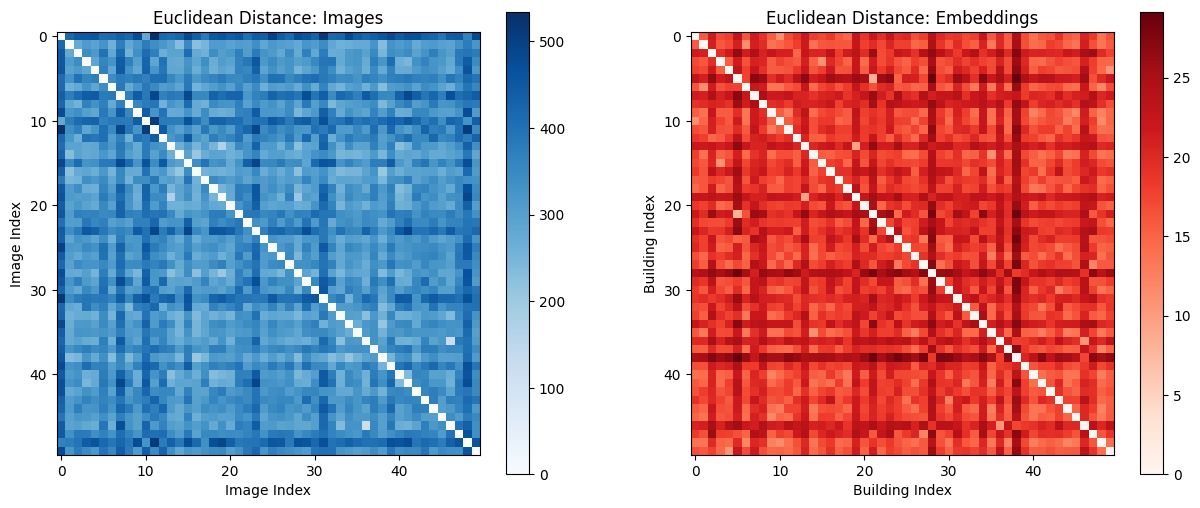

In [14]:
# Plot the distance matrix
figs, axs = plt.subplots(1, 2, figsize=(15, 6))

im1 = axs[0].imshow(distance_tile_images, interpolation='nearest', cmap='Blues')
figs.colorbar(im1, ax=axs[0])
axs[0].set_title('Euclidean Distance: Images')
axs[0].set_xlabel('Image Index')
axs[0].set_ylabel('Image Index')

im2 = axs[1].imshow(distance_tile, interpolation='nearest', cmap='Reds')
figs.colorbar(im2, ax=axs[1])
axs[1].set_title('Euclidean Distance: Embeddings')
axs[1].set_xlabel('Building Index')
axs[1].set_ylabel('Building Index')

# plt.tight_layout()
plt.show()

### Find and explore the most (dis)similar buildings
This is now a very exciting exercise, we ask our machine to tell us which buildings are similar (or dissimilar) from a particular building, which we will denote as **query building**. To do (and as usual), we will quickly set up a function.

This function receives as input:
- The distance tensor we computed previously
- The query building
- The full list of building indices
- The number of buildings most (dis)similar to the query building

The output includes:
- The most similar buildings `building_indices_min`
- The most different building `building_indices_max`

In [15]:
def get_similar_building(distance_tensor, query_building, building_indices, n_builds):

    # Retrieve the index within the tensor
    index_query_tensor = building_indices.index(query_building)

    distance_from_query = distance_tensor[index_query_tensor]

    # Use torch.topk to find the top 5 values and their indices
    values_min, indices_min = torch.topk(distance_from_query * -1, n_builds)
    values_min = values_min * -1
    values_max, indices_max = torch.topk(distance_from_query, n_builds)

    # Convert torch indices to a list of building indices
    building_indices_min = [building_indices[item] for item in indices_min.tolist()]
    building_indices_max = [building_indices[item] for item in indices_max.tolist()]

    return building_indices_min, building_indices_max

💫 You can now run the function for a particular query building.

In [16]:
query_building = 51 # Query building
n_builds = 5

# (Dis)similar images "raw image representation"
similar_build_images, dissimilar_build_images = get_similar_building(distance_tile_images, query_building, ind_build, n_builds)
# (Dis)similar images "embedding representation"
similar_build_embed, dissimilar_build_embed = get_similar_building(distance_tile, query_building, ind_build, n_builds)

# Let's cross-check the results before visualizing them
# Yes, the most similar building should be the query itself :)
print('images similarity:', similar_build_images, dissimilar_build_images)
print('embeddings similarity:', similar_build_embed, dissimilar_build_embed)

images similarity: [51, 735, 1116, 1034, 65] [1309, 209, 1209, 447, 457]
embeddings similarity: [51, 65, 1330, 600, 1034] [735, 13, 457, 161, 407]


In [17]:
print('images similarity:', similar_build_images, dissimilar_build_images)
print('embeddings similarity:', similar_build_embed, dissimilar_build_embed)

images similarity: [51, 735, 1116, 1034, 65] [1309, 209, 1209, 447, 457]
embeddings similarity: [51, 65, 1330, 600, 1034] [735, 13, 457, 161, 407]


### Visualize and interpret the results

In [18]:
def visualize_images(similar_build, dissimilar_build):

  # Get the path of the images
  filenames_sim = [f"aerial_images/{item}.png" for item in similar_build]
  filenames_dis = [f"aerial_images/{item}.png" for item in dissimilar_build]

  # Number of rows and columns for the grid
  n_rows = 2
  n_cols = len(filenames_sim)

  # Create the matplotlib grid for visualization
  fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))

  for i in range(n_cols):
    # Load and visualize the image from similar_build
    image_sim = np.array(Image.open(filenames_sim[i]))
    axs[0, i].imshow(image_sim)
    axs[0, i].set_title(filenames_sim[i].split('/')[-1])  # Optional: Show filename as title
    axs[0, i].axis('off')  # Hide axes for better visualization

    # Load and visualize the image from dissimilar_build
    image_dis = np.array(Image.open(filenames_dis[i]))
    axs[1, i].imshow(image_dis)
    axs[1, i].set_title(filenames_dis[i].split('/')[-1])  # Optional: Show filename as title
    axs[1, i].axis('off')  # Hide axes for better visualization

  plt.tight_layout()
  plt.show()

Based on the distance computed at the pixel level, building similarity can be visualized below.

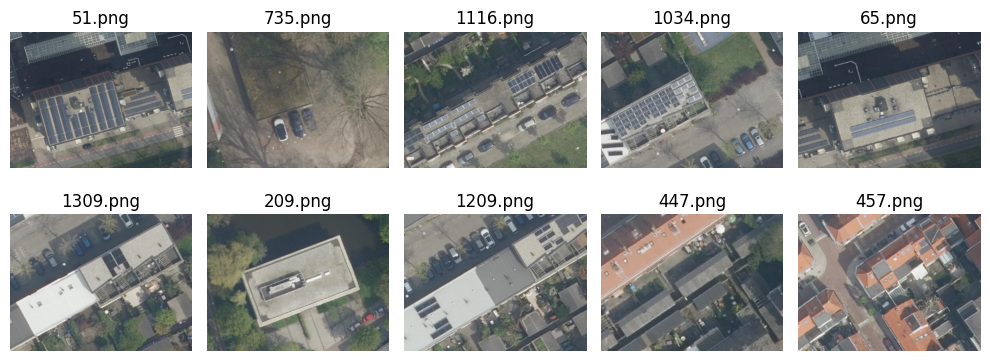

In [19]:
visualize_images(similar_build_images, dissimilar_build_images)

Relying on embeddings, instead, building similarity can be visualized below.

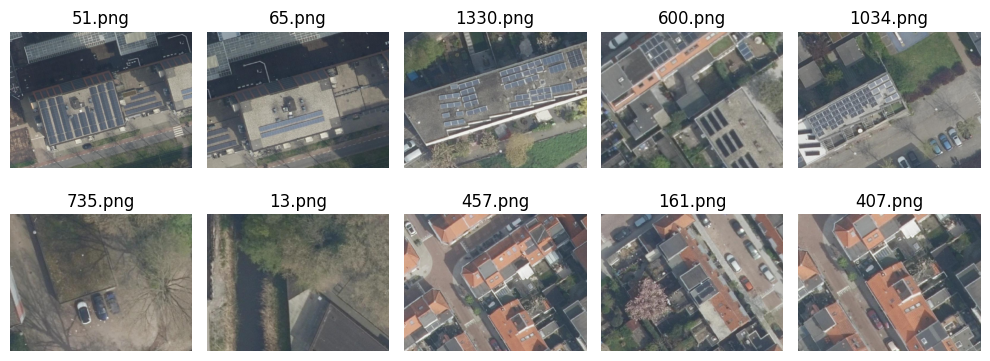

In [20]:
visualize_images(similar_build_embed, dissimilar_build_embed)

## In your opinion, which representation makes qualitatively more sense?

# Assignment: Find similar buildings at scale!

- 2p: find the boundary coordinates that enclose your *query* building and extract its corresponding aerial image (ETC: 60 mins)
- 2p: compute the embedding representation of your *query* buiding via DINOv2 (ETC: 30 mins)
- 2p: find the 5 most similar buildings and 5 least similar buildings within the gallery (ETC: 120 mins)
- 2p: extract the images from the 5 most similar and 5 least similar buildings (ETC: 30 mins)
- 2p: visualize the extracted images and interpret the results (ETC: 60 mins)

👉 You can download the embeddings gallery and corresponding coordinate boxes and bag ids [here](https://drive.google.com/drive/folders/17Ip1QTK2UCOzE-Dwm9ibcNxWNTimiu_1?usp=drive_link)

### **Output**</br>
**Write your findings and interpretation in a new notebook** and name it **"A4_beyond_boundaries_\<name\>.ipynb"**.

- Deadline: Friday, March 22

## Assignment guidelines

### (1) Find the coordinates of your query building and extract its aerial image
With the assistance of 3D BAG or OpenStreetMap, find the coordinates box that encloses your query building. (Recall, the coordinate reference system should be **EPSG:28992**).

Follow the steps explained in the tutorial to extract the aerial view of your query building.

### (2) Compute the embeddings of your query image
Relying on DINOv2, compute the embedding. Follow the tutorial for the necessary steps.

### (3) Find the 5 most similar and the 5 least similar  buildings
- At the embedding space, compute the Euclidean distance between your query building and the building gallery.
- Find the most (dis)similar buildings as torch indices


### (4) Extract the aerial images of (dis)similar buildings
- Get the building coordinates from the gallery list in a dictionary, as shown in the tutorial
- Extract the aerial images via QGIS and the dictionary

### (6) Visualize and interpret the extracted images
Following the steps in the tutorial, visualize the results in a matplotlib grid.
Finally discuss the obtained results.

# Additional topics

## How to install QGIS and PDOK's plugin?

You can install QGIS following the instructions provided [here](https://www.qgis.org/en/site/forusers/download.html).

Once QGIS is installed on your machine, you can add PDOK's plugin. To do that go to `Plugins/Manage and Install Plugins...` at the top bar, then search and add `PDOK services plugin`. You can find further instructions on how to add plugins [here](https://docs.qgis.org/2.18/en/docs/user_manual/plugins/plugins.html#:~:text=To%20install%20or%20activate%20a,C%3A%5CUsers%5C(user)%20.).

## JSON and Pickle loading and unloading

You may need to load/unload JSON and/or Pickle files in this tutorial/assignment. Please find some instructions below.

In [ ]:
# Don't forget to import json
import json

# Load a JSON file
with open('filename.json') as f:
    info_stored = json.load(f)

# Store a JSON file
with open('filename.json', 'w') as f: # Note we specify 'w' here
    json.dump(info_to_be_stored, f)

In [ ]:
# Don't forget to import pickle
import pickle

# Load a Pickle file
with open('filename.pkl', 'rb') as f: # Note that we specify 'rb' here
    info_stored = pickle.load(f)

# Store a Pickle file
with open('filename.pkl.pkl', 'wb') as f: # Note that we specify 'wb' here
    pickle.dump(info_to_be_stored, f)


## Automate image collection through Cyclomedia's API

In [ ]:
# As usual in Python, let's load the necessary modules
import requests
from requests.auth import HTTPBasicAuth

You can decide where the images will be stored here:

In [ ]:
#directory where the images will be stored
images_path = "/content/drive/MyDrive/Cyclomedia"
# using chdir to change the directory
os.chdir(images_path)

In [ ]:
# Hmmm, where are we?
os.getcwd()

'/content/drive/MyDrive/Cyclomedia'

This is where the magic happens, we define a function to establish connection with Cyclomedia's API, retrieving the street view images we are asking for.

In [ ]:
def get_image(COOR_X,
            COOR_Y,
            name_image='image_0',
            path_image='',
            hfov='90',
            pitch='0',
            yaw='0',
            width='1024',
            height='786',
            index='0'):

    # ! Specify you user and pass here (very private) :)
    username = 'P.G.MoratoDominguez@tudelft.nl' #Your user here
    password = 'your password here'

    # Construct the URL to connect with the API
    URL_START = 'https://atlasapi.cyclomedia.com/api/PanoramaRendering/RenderByLocation2D/'
    CRS = '28992'
    API_KEY = '2XU9ajAxS3YtKvgVCD4h-30lK3IpOb8x-HApGTcRCf09a7UVuX8h-r4ZarYZ2nIB'
    # COOR_X = '94313.15'
    # COOR_Y = '435711.11'
    HFOV = hfov
    PITCH = pitch
    YAW = yaw
    WIDTH = width
    HEIGHT = height
    INDEX = index

    file_name = path_image + name_image + '.jpeg'

    url = URL_START \
    + CRS + '/' \
    + COOR_X + '/' + COOR_Y \
    + '/?width=' + WIDTH + '&height=' + HEIGHT \
    + '&hfov=' + HFOV \
    + '&apiKey=' + API_KEY \
    + '&pitch=' + PITCH + '&yaw=' + YAW \
    + '&index=' + INDEX

    # Contact the API and request the images
    response = requests.get(url, auth=HTTPBasicAuth(username, password))

    if response.status_code == 200: # This means everything went well
        with open(file_name, 'wb') as f:
            f.write(response.content) # Store the images
        return file_name
    else: # If there was an error, we need to know about it!
        print('Error: ', response.status_code)
        return None

How can we get an image based on 2D coordinates? Well, we just need to call the function defined above.

In [ ]:
coor_x = '68554.7'
coor_y = '445294.4'

get_image(coor_x, coor_y, 'image_0', yaw='0')

'image_0.jpeg'

### Extracting street view images from a grid of coordinates

We define here a function to generate a grid of 2D coordinates from 2 provided corners, upper-left and bottom-right.

In [ ]:
def create_grid_with_two_corners(upper_left, bottom_right, points_per_edge):
    """
    Generates a grid of equally spaced 2D coordinates within a rectangular area defined by the upper left
    and bottom right corner points.

    :param upper_left: A tuple representing the upper left corner of the rectangle as a 2D coordinate (longitude, latitude).
    :param bottom_right: A tuple representing the bottom right corner of the rectangle as a 2D coordinate (longitude, latitude).
    :param points_per_edge: The number of points to interpolate along each edge of the rectangle, including the corners.
    :return: A list of tuples, where each tuple represents a point within the grid.
    """
    # Extract longitude and latitude values from the corners
    min_longitude, max_latitude = upper_left
    max_longitude, min_latitude = bottom_right

    # Calculate the spacing between each point in the grid for both longitude and latitude
    longitude_spacing = (max_longitude - min_longitude) / (points_per_edge - 1)
    latitude_spacing = (max_latitude - min_latitude) / (points_per_edge - 1)

    # Generate the grid points
    grid_points = []
    for i in range(points_per_edge):
        for j in range(points_per_edge):
            # Calculate the longitude and latitude for each grid point
            point_longitude = min_longitude + (i * longitude_spacing)
            point_latitude = max_latitude - (j * latitude_spacing)

            # Add the calculated point to our list of grid points
            grid_points.append((point_longitude, point_latitude))

    # Return the list of grid points
    return grid_points

In [ ]:
# Example usage:
upper_left = (67910.5, 445297.3)  # Define the upper left corner of the rectangle
bottom_right = (68344.1, 445033.3)  # Define the bottom right corner of the rectangle
points_per_edge = 3  # Specify the number of points along each edge

# Generate the grid
grid = create_grid_with_two_corners(upper_left, bottom_right, points_per_edge)

In [ ]:
# (Optional) Print each point in the grid
for point in grid:
    print(point)

(67910.5, 445297.3)
(67910.5, 445165.3)
(67910.5, 445033.3)
(68127.3, 445297.3)
(68127.3, 445165.3)
(68127.3, 445033.3)
(68344.1, 445297.3)
(68344.1, 445165.3)
(68344.1, 445033.3)


Let's automate the image extraction (we don't want to be extracting each image one-by-one).

In [ ]:
def extract_images_from_grid(grid_input, name_image, path_image, hfov='90', pitch='0', yaw='0', width='1024', height='786', index='0'):
    for i, point in enumerate(grid_input):
        coor_x, coor_y = point
        get_image(str(coor_x), str(coor_y), name_image + '_' + str(i), path_image, hfov, pitch, yaw, width, height, index)

Finally, one line of code to extract all images! :)

In [ ]:
extract_images_from_grid(grid, 'image_test', 'Grid_tests/', yaw='0')